# Hydrograph Development Notebooks

### Create a Breach Hydrograph for 2 locations at a levee using 1D HEC-RAS Model & USGS Gage Records 

### Example: Deposit, NY

In [1]:
import os
from glob import glob

from importlib import reload
import utils; reload(utils)
from utils import *
import ny_clean_nb; reload(ny_clean_nb)
from ny_clean_nb import *

import pandas as pd
import numpy as np
from scipy import interpolate 

import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

###  Read in Base Hydrograph
    1. Read in Base Hydrograph from TR-20 Hydrologic model (Unsteady HEC-RAS file)

Big_Hollow
Butler_Brook


Big_Hollow      2372.5
Butler_Brook    2260.0
dtype: float32

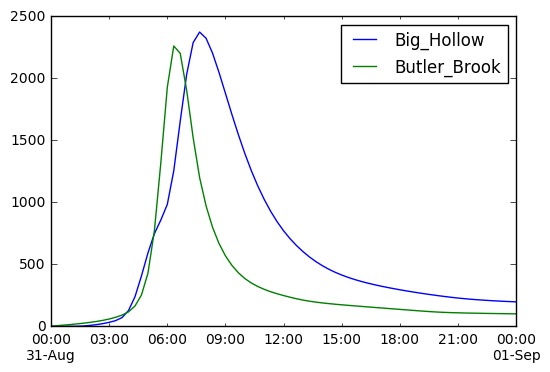

In [4]:
hdf_plan_file = r'p:\02\NY\Broome_Co_36007C\LAMP2\TECH\Analysis\Modeling\WorkingModels\TOQC\Deposit\Deposit.p06.hdf'
df = GetRasUnsteadyFlow(hdf_plan_file)
df.plot()
df.max()

# Procedure to create Breach Hydrograph

    1. Read in RAS data for XS of interest & create stage/discharge Rating Curve

    2. Convert River Discharge to stage using the rating curve from HEC-RAS

    3. Translate Stage to head (above selected breach height) and compute weir flow  
    
    4. Write calculated weir flow to file & input into HEC-RAS unsteady flow file

#### The Standard Weir Equation:
$$ Q = CLH^{2/3} $$

Where:  Q = discharge, C =weir coefficient, L = weir crest length, H = Energy head over the weir crest.


*From HEC-as Lateral Wier Coefficients, default Weir Coefficient of 2.0 (range is 1.5-2.6, given on page 3-50 of the 2D Manual)*

### Breach Location # 1: Big Hollow (upstream) 
[Click For Image](https://raw.githubusercontent.com/Dewberry-RSG/HydrologyTools/master/images/56045.65_location_2.JPG)


**RAS Data for XS 938**

**
Inflow Data for Breach Location: **

C:\Users\slawler\Desktop\BreachData_938_location_1.tsv


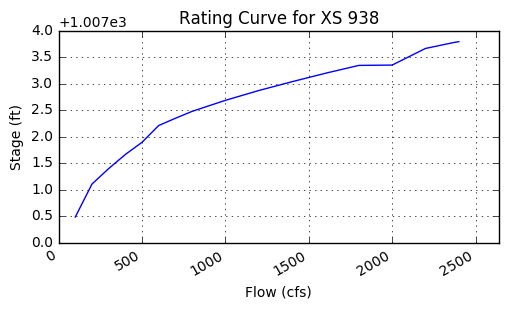

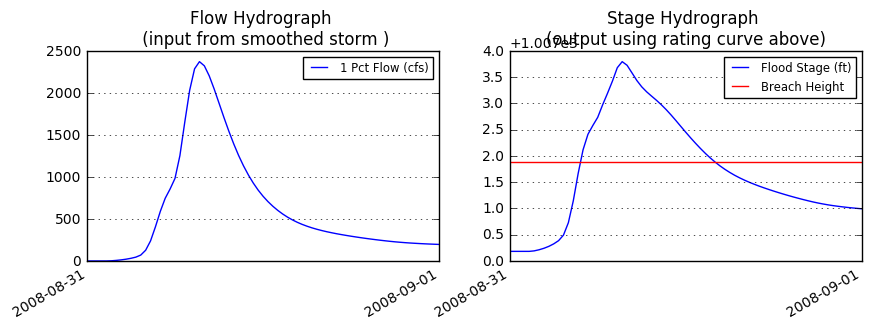

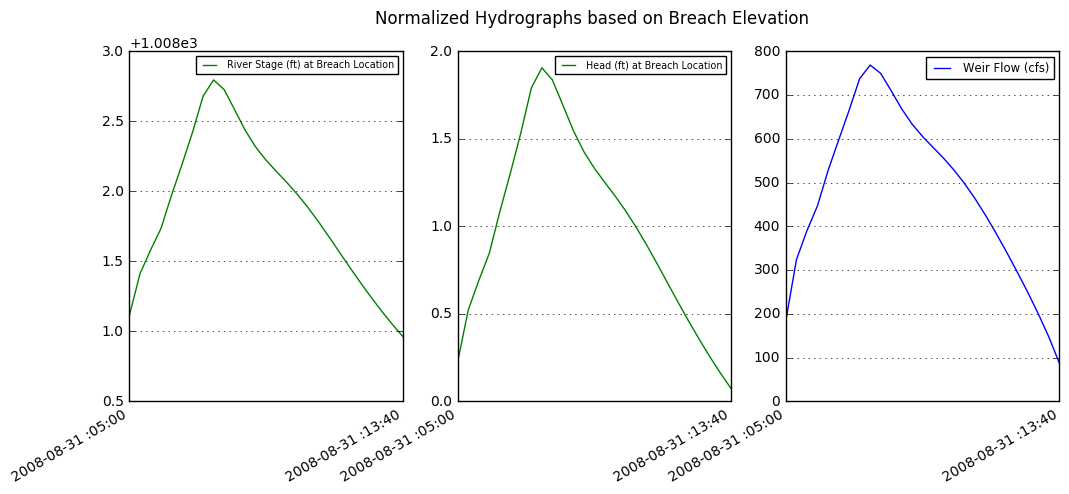

In [7]:
input_hydro = df['Big_Hollow']
rasdata = r'p:\02\NY\Broome_Co_36007C\LAMP2\TECH\Analysis\Modeling\WorkingModels\TOQC\Deposit\Deposit.p03.hdf'
station = str(938)
breach_point = 1
breach_height = 1008.89

data_dir = r'C:\Users\slawler\Desktop'
GetBreachFlow(input_hydro, rasdata, station, breach_point, breach_height, data_dir, date_int = 24)

### Breach Location # 2: Big Hollow (downstream)
[Click For Image](https://raw.githubusercontent.com/Dewberry-RSG/HydrologyTools/master/images/56045.65_location_2.JPG)

**RAS Data for XS 281**

**
Inflow Data for Breach Location: **

C:\Users\slawler\Desktop\BreachData_281_location_1.tsv


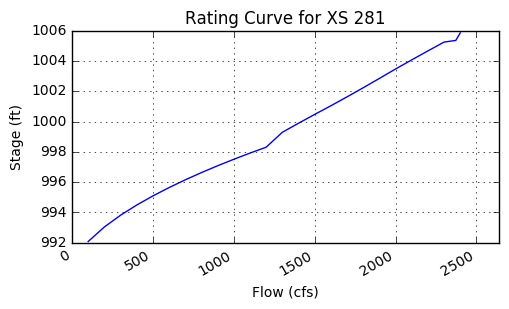

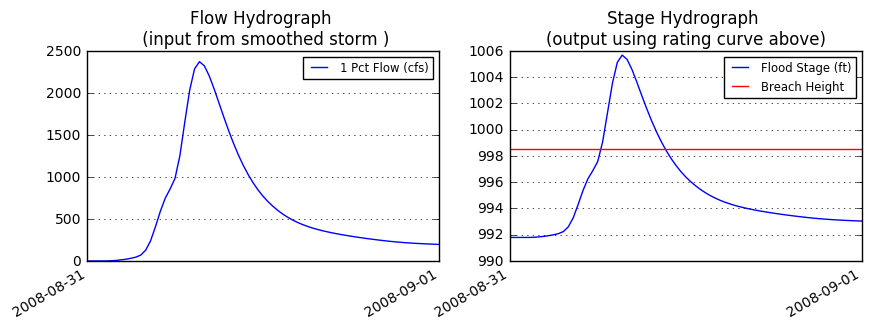

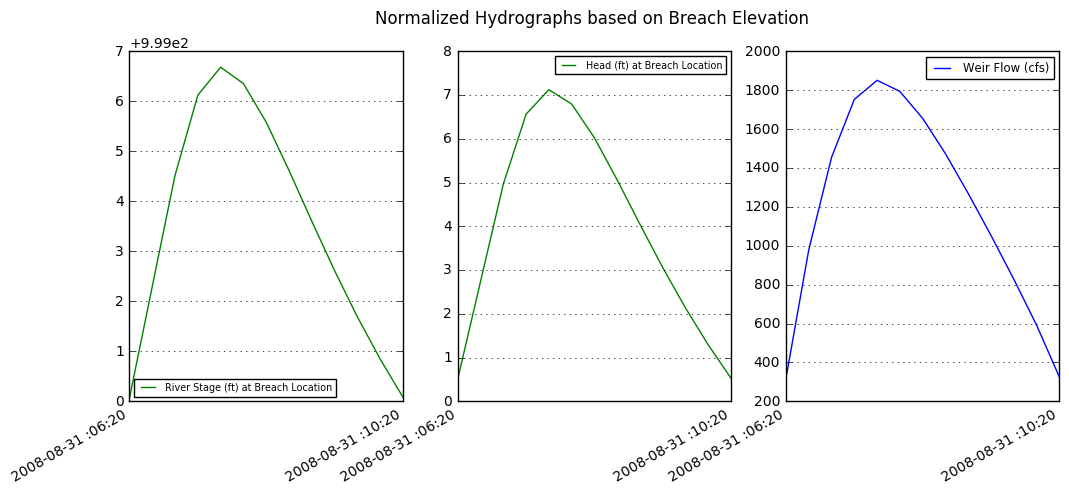

In [10]:
input_hydro = df['Big_Hollow']
rasdata = r'p:\02\NY\Broome_Co_36007C\LAMP2\TECH\Analysis\Modeling\WorkingModels\TOQC\Deposit\Deposit.p09.hdf'
station = str(281)
breach_point = 1
breach_height = 998.56

data_dir = r'C:\Users\slawler\Desktop'
GetBreachFlow(input_hydro, rasdata, station, breach_point, breach_height, data_dir, date_int = 24)

### Breach Location # 1: Butler Brook (upstream)
[Click For Image](https://raw.githubusercontent.com/Dewberry-RSG/HydrologyTools/master/images/56045.65_location_2.JPG)


**RAS Data for XS 565**

**
Inflow Data for Breach Location: **

C:\Users\slawler\Desktop\BreachData_565_location_1.tsv


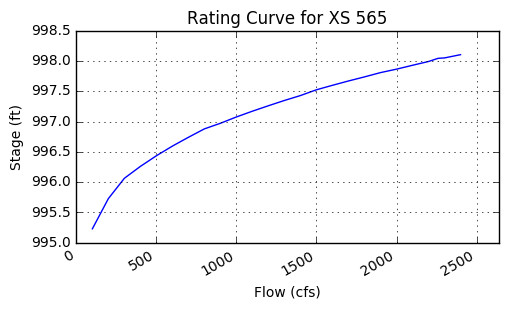

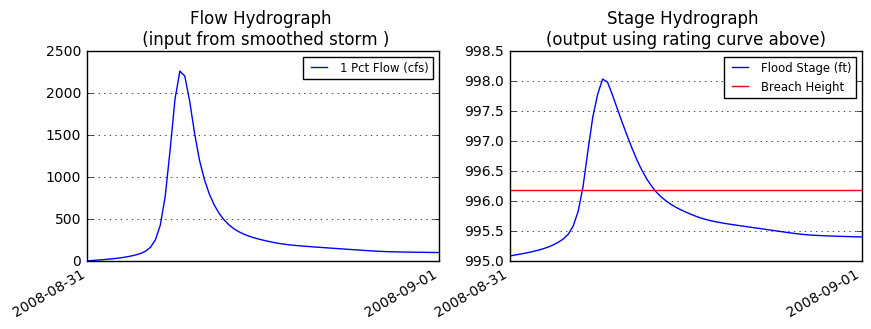

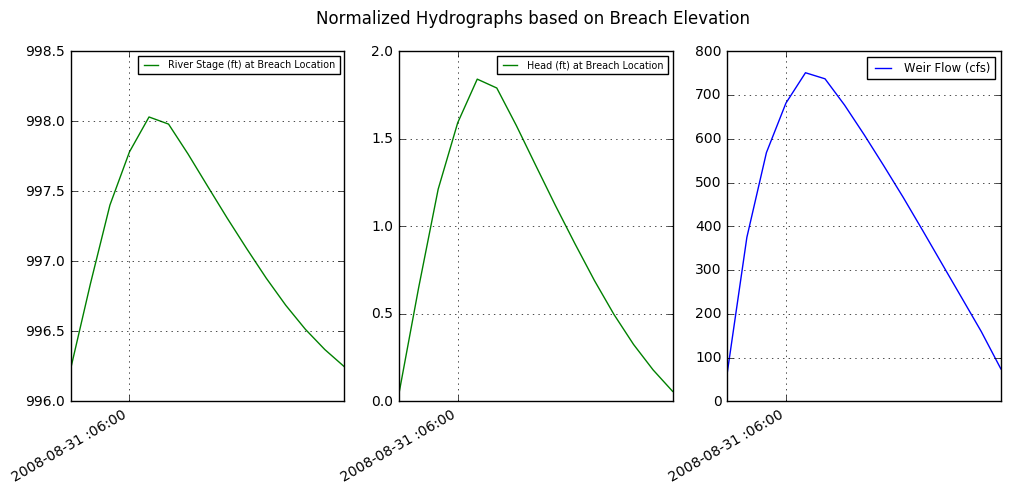

In [11]:
input_hydro = df['Butler_Brook']
rasdata = r'p:\02\NY\Broome_Co_36007C\LAMP2\TECH\Analysis\Modeling\WorkingModels\TOQC\Deposit\Deposit.p04.hdf'
station = str(565)
breach_point = 1
breach_height = 996.19

data_dir = r'C:\Users\slawler\Desktop'
GetBreachFlow(input_hydro, rasdata, station, breach_point, breach_height, data_dir, date_int = 6)

### Breach Location # 2:
[Click For Image](https://raw.githubusercontent.com/Dewberry-RSG/HydrologyTools/master/images/53914.48_location_2.JPG)


**RAS Data for XS 287**

**
Inflow Data for Breach Location: **

C:\Users\slawler\Desktop\BreachData_287_location_2.tsv


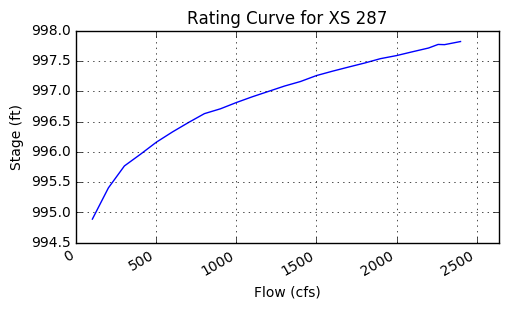

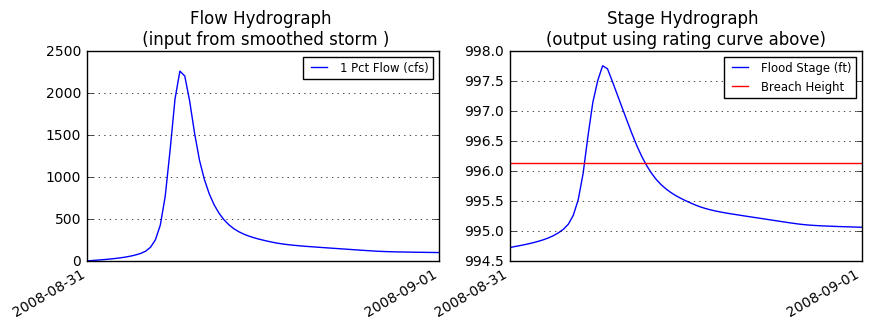

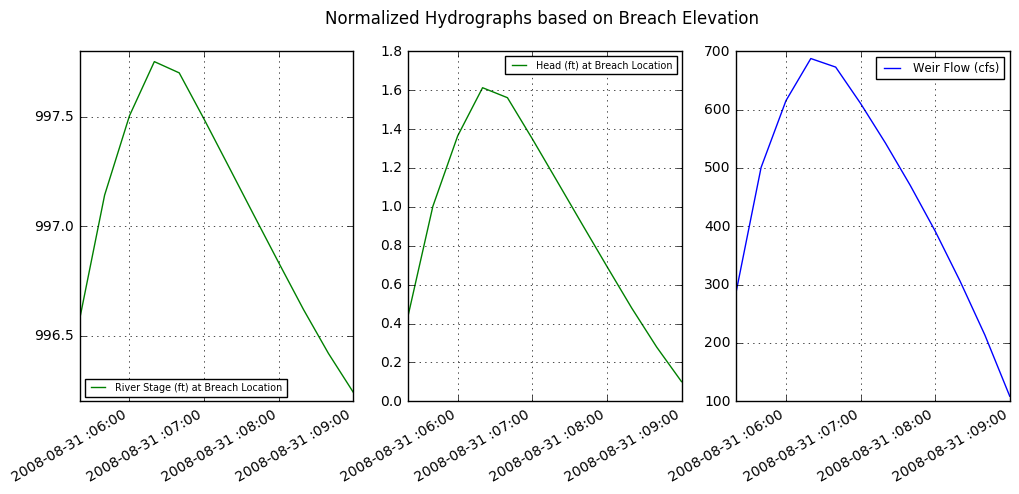

In [12]:
input_hydro = df['Butler_Brook']
rasdata = r'p:\02\NY\Broome_Co_36007C\LAMP2\TECH\Analysis\Modeling\WorkingModels\TOQC\Deposit\Deposit.p04.hdf'
station = str(287)
breach_point = 2
breach_height = 996.14

data_dir = r'C:\Users\slawler\Desktop'
GetBreachFlow(input_hydro, rasdata, station, breach_point, breach_height, data_dir, date_int = 1)